In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### TODOS JUNTOS

In [3]:
# LQ800_results_16bins_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[0]
# LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[1]
# LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[2]

# LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[9]
# LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[10]
# LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[11]

In [4]:
# LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[0]
# LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[1]
# LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[2]

# LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[9]
# LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[10]
# LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[11]

In [9]:
results_16bins_beta01 = [LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta01 = [LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta01 = [LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta01 = [LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta01 = [LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta01 = [LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta03 = [LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta03 = [LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta03 = [LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta03 = [LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta03 = [LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta03 = [LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta05 = [LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta05 = [LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta05 = [LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta05 = [LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta05 = [LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta05 = [LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta07 = [LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta07 = [LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta07 = [LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta07 = [LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta07 = [LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta07 = [LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta09 = [LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta09 = [LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta09 = [LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta09 = [LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta09 = [LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta09 = [LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]

In [10]:
results_16bins_beta01.append( (results_16bins_beta01[-1] - results_16bins_beta01[-2]) + results_16bins_beta01[-1] )
results_16bins_plus_beta01.append( (results_16bins_plus_beta01[-1] - results_16bins_plus_beta01[-2]) + results_16bins_plus_beta01[-1] )
results_16bins_min_beta01.append( (results_16bins_min_beta01[-1] - results_16bins_min_beta01[-2]) + results_16bins_min_beta01[-1] )

results_MLL_KDE_beta01.append( (results_MLL_KDE_beta01[-1] - results_MLL_KDE_beta01[-2]) + results_MLL_KDE_beta01[-1] )
results_MLL_KDE_plus_beta01.append( (results_MLL_KDE_plus_beta01[-1] - results_MLL_KDE_plus_beta01[-2]) + results_MLL_KDE_plus_beta01[-1] )
results_MLL_KDE_min_beta01.append( (results_MLL_KDE_min_beta01[-1] - results_MLL_KDE_min_beta01[-2]) + results_MLL_KDE_min_beta01[-1] )


results_16bins_beta03.append( (results_16bins_beta03[-1] - results_16bins_beta03[-2]) + results_16bins_beta03[-1] )
results_16bins_plus_beta03.append( (results_16bins_plus_beta03[-1] - results_16bins_plus_beta03[-2]) + results_16bins_plus_beta03[-1] )
results_16bins_min_beta03.append( (results_16bins_min_beta03[-1] - results_16bins_min_beta03[-2]) + results_16bins_min_beta03[-1] )

results_MLL_KDE_beta03.append( (results_MLL_KDE_beta03[-1] - results_MLL_KDE_beta03[-2]) + results_MLL_KDE_beta03[-1] )
results_MLL_KDE_plus_beta03.append( (results_MLL_KDE_plus_beta03[-1] - results_MLL_KDE_plus_beta03[-2]) + results_MLL_KDE_plus_beta03[-1] )
results_MLL_KDE_min_beta03.append( (results_MLL_KDE_min_beta03[-1] - results_MLL_KDE_min_beta03[-2]) + results_MLL_KDE_min_beta03[-1] )


results_16bins_beta05.append( (results_16bins_beta05[-1] - results_16bins_beta05[-2]) + results_16bins_beta05[-1] )
results_16bins_plus_beta05.append( (results_16bins_plus_beta05[-1] - results_16bins_plus_beta05[-2]) + results_16bins_plus_beta05[-1] )
results_16bins_min_beta05.append( (results_16bins_min_beta05[-1] - results_16bins_min_beta05[-2]) + results_16bins_min_beta05[-1] )

results_MLL_KDE_beta05.append( (results_MLL_KDE_beta05[-1] - results_MLL_KDE_beta05[-2]) + results_MLL_KDE_beta05[-1] )
results_MLL_KDE_plus_beta05.append( (results_MLL_KDE_plus_beta05[-1] - results_MLL_KDE_plus_beta05[-2]) + results_MLL_KDE_plus_beta05[-1] )
results_MLL_KDE_min_beta05.append( (results_MLL_KDE_min_beta05[-1] - results_MLL_KDE_min_beta05[-2]) + results_MLL_KDE_min_beta05[-1] )


results_16bins_beta07.append( (results_16bins_beta07[-1] - results_16bins_beta07[-2]) + results_16bins_beta07[-1] )
results_16bins_plus_beta07.append( (results_16bins_plus_beta07[-1] - results_16bins_plus_beta07[-2]) + results_16bins_plus_beta07[-1] )
results_16bins_min_beta07.append( (results_16bins_min_beta07[-1] - results_16bins_min_beta07[-2]) + results_16bins_min_beta07[-1] )

results_MLL_KDE_beta07.append( (results_MLL_KDE_beta07[-1] - results_MLL_KDE_beta07[-2]) + results_MLL_KDE_beta07[-1] )
results_MLL_KDE_plus_beta07.append( (results_MLL_KDE_plus_beta07[-1] - results_MLL_KDE_plus_beta07[-2]) + results_MLL_KDE_plus_beta07[-1] )
results_MLL_KDE_min_beta07.append( (results_MLL_KDE_min_beta07[-1] - results_MLL_KDE_min_beta07[-2]) + results_MLL_KDE_min_beta07[-1] )


results_16bins_beta09.append( (results_16bins_beta09[-1] - results_16bins_beta09[-2]) + results_16bins_beta09[-1] )
results_16bins_plus_beta09.append( (results_16bins_plus_beta09[-1] - results_16bins_plus_beta09[-2]) + results_16bins_plus_beta09[-1] )
results_16bins_min_beta09.append( (results_16bins_min_beta09[-1] - results_16bins_min_beta09[-2]) + results_16bins_min_beta09[-1] )

results_MLL_KDE_beta09.append( (results_MLL_KDE_beta09[-1] - results_MLL_KDE_beta09[-2]) + results_MLL_KDE_beta09[-1] )
results_MLL_KDE_plus_beta09.append( (results_MLL_KDE_plus_beta09[-1] - results_MLL_KDE_plus_beta09[-2]) + results_MLL_KDE_plus_beta09[-1] )
results_MLL_KDE_min_beta09.append( (results_MLL_KDE_min_beta09[-1] - results_MLL_KDE_min_beta09[-2]) + results_MLL_KDE_min_beta09[-1] )


<ipython-input-11-be51dfebf8ce>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta01, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-be51dfebf8ce>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta01, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta01, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). T

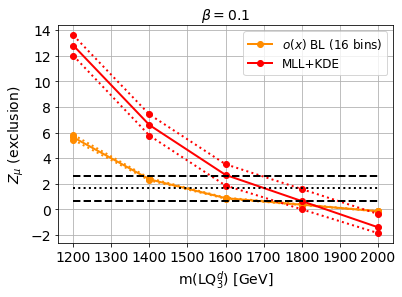

<ipython-input-11-be51dfebf8ce>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta03, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-be51dfebf8ce>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta03, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta03, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

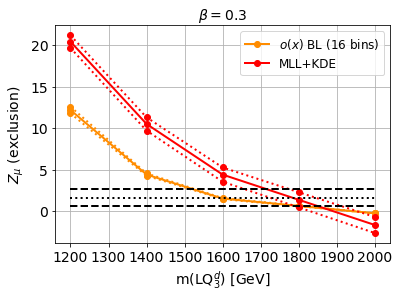

<ipython-input-11-be51dfebf8ce>:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta05, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-be51dfebf8ce>:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta05, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta05, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

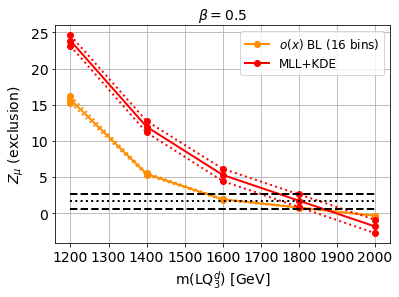

<ipython-input-11-be51dfebf8ce>:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta07, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-be51dfebf8ce>:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta07, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta07, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

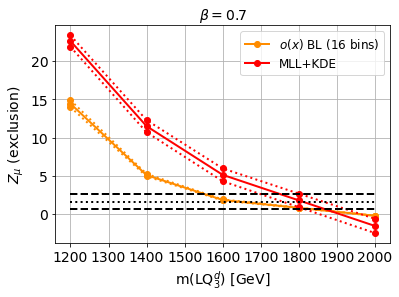

<ipython-input-11-be51dfebf8ce>:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta09, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-be51dfebf8ce>:102: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta09, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:103: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta09, ':ok', color='darkorange', lw=lw)
<ipython-input-11-be51dfebf8ce>:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k

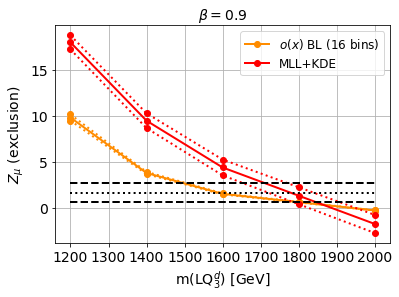

In [11]:
#masses = [800, 1000, 1200, 1400, 1600, 1800]
masses = [1200, 1400, 1600, 1800, 2000]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta01, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [12]:
# Interpolation, cubic
res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

In [13]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1200, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [14]:
beta = [0.1,0.3,0.5,0.7,0.9]


mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins = [mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09]
mass_16bins_plus = [mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09]
mass_16bins_min = [mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09]
mass_MLL = [mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09]
mass_MLL_plus = [mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09]
mass_MLL_min = [mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[1472.0092733131403, 1585.3799097187282, 1634.5272300490913, 1626.7001621157467, 1580.7401993269002]
[1479.5521229679882, 1592.4996458173787, 1642.3568384435093, 1634.8439693232256, 1589.0706510038528]
[1464.3522082341235, 1578.1706856955207, 1626.6838268822798, 1618.5525293231278, 1572.2726244190123]
[1691.0513994245553, 1780.836552447937, 1806.7506718939, 1810.1193007282736, 1776.8837826127967]
[1794.20321457849, 1846.536881414632, 1859.1588034802387, 1866.4284892092119, 1840.593948164897]
[1617.0683102192713, 1713.6298921120076, 1753.4531203749134, 1753.1809871800942, 1713.7320777226914]


In [15]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998

beta_ATLAS = [0.0,0.0055605,0.010101,0.011175,0.016681,0.020202,0.02206,0.027174,0.030303,0.031929,0.036353,0.040404,0.040563,0.04484,0.049374,0.050505,0.054477,0.06021,0.060606,0.066647,0.070707,0.073462,0.080396,0.080808,0.087386,0.090909,0.094345,0.10101,0.10154,0.10947,0.11111,0.11841,0.12121,0.12873,0.13131,0.14064,0.14141,0.15152,0.15449,0.16162,0.17034,0.17172,0.18182,0.18895,0.19192,0.20202,0.21133,0.21212,0.22222,0.23232,0.23986,0.24242,0.25253,0.26263,0.27273,0.27806,0.28283,0.29293,0.30303,0.31313,0.32323,0.33188,0.33333,0.34343,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41414,0.41599,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68551,0.68687,0.69697,0.70707,0.71717,0.72727,0.73737,0.74747,0.75758,0.75862,0.76768,0.77778,0.78788,0.79798,0.79895,0.80808,0.81818,0.82745,0.82828,0.83838,0.84848,0.85245,0.85859,0.86869,0.87721,0.87879,0.88889,0.89899,0.90151,0.90909,0.91919,0.92359,0.92929,0.93939,0.94203,0.94949,0.95666,0.9596,0.96827,0.9697,0.97795,0.9798,0.9867,0.9899,0.99521,1.0]
mass_Z95CL_ATLAS = [771.93,787.88,800.86,804.04,820.2,830.76,836.36,852.53,863.22,868.69,884.85,900.42,901.01,917.17,933.33,937.08,949.49,965.66,966.72,981.82,991.76,997.98,1014.1,1015.2,1030.3,1038.8,1046.5,1061.5,1062.6,1078.8,1082.0,1094.9,1099.7,1111.1,1114.9,1127.3,1128.3,1140.3,1143.4,1151.2,1159.6,1161.0,1170.1,1175.8,1178.2,1185.7,1191.9,1192.5,1198.7,1204.3,1208.1,1209.4,1214.1,1218.4,1222.3,1224.2,1225.9,1229.3,1232.5,1235.4,1238.2,1240.4,1240.8,1243.2,1245.4,1247.5,1249.5,1251.4,1253.1,1254.8,1256.3,1256.6,1257.7,1258.9,1260.1,1261.1,1262.1,1262.9,1263.6,1264.3,1264.8,1265.2,1265.6,1265.8,1265.9,1265.9,1265.8,1265.6,1265.3,1264.9,1264.4,1263.8,1263.1,1262.3,1261.3,1260.3,1259.1,1257.8,1256.6,1256.4,1254.7,1252.9,1250.9,1248.7,1246.3,1243.6,1240.7,1240.4,1237.4,1233.6,1229.4,1224.7,1224.2,1219.6,1213.9,1208.1,1207.6,1201.5,1194.8,1191.9,1188.2,1181.7,1175.8,1174.8,1168.3,1161.4,1159.6,1154.3,1146.9,1143.4,1138.7,1129.7,1127.3,1119.3,1111.1,1107.2,1094.9,1092.7,1078.8,1075.5,1062.6,1056.7,1046.5,1037.4]

beta_ATLAS_plus1sig = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mass_Z95CL_ATLAS_plus1sig = [600,970,1095,1140,1160,1172,1170,1160,1135,1060,910]

beta_ATLAS_minus1sig = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mass_Z95CL_ATLAS_minus1sig = [840,1150,1250,1290,1310,1320,1320,1316,1300,1260,1145]

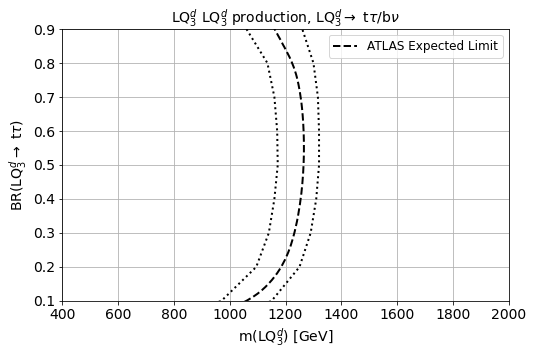

In [16]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<ipython-input-17-6d5f25643129>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins, beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-17-6d5f25643129>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins_plus, beta, ':ok', color='darkorange', lw=lw)
<ipython-input-17-6d5f25643129>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins_min, beta, ':ok', color='darkorange', lw=lw)
<ipython-input-17-6d5f25643129>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedenc

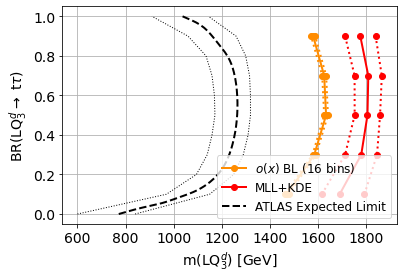

In [17]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':ok', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':ok', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':ok', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':ok', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

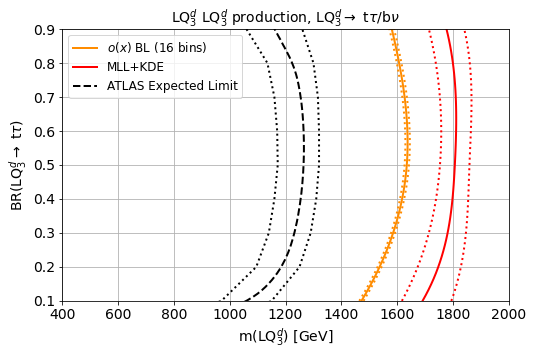

In [18]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='cubic')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='cubic')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='cubic')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='cubic')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='cubic')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='cubic')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

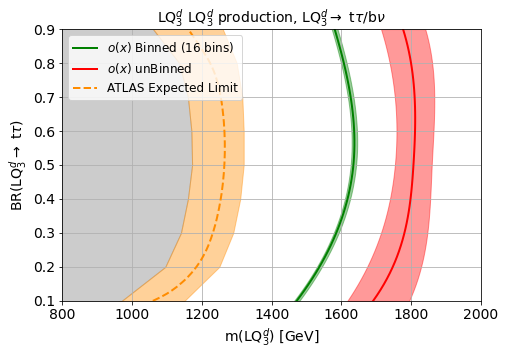

In [19]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('exclusion_LQdown_14TeV.pdf', bbox_inches='tight')
plt.show()

In [20]:
mass_Z95CL_16bins(plotX_beta)

array([1472.00927331, 1483.77567705, 1495.0874773 , 1505.94704085,
       1516.35673449, 1526.318925  , 1535.83597918, 1544.91026381,
       1553.54414568, 1561.73999158, 1569.5001683 , 1576.82704264,
       1583.72298137, 1590.19035128, 1596.23151917, 1601.84885183,
       1607.04471603, 1611.82147858, 1616.18150626, 1620.12716585,
       1623.66082416, 1626.78484796, 1629.50160404, 1631.8134592 ,
       1633.72278022, 1635.23213096, 1636.3486079 , 1637.08384014,
       1637.44965384, 1637.45787516, 1637.12033028, 1636.44884535,
       1635.45524656, 1634.15136005, 1632.54901201, 1630.66002859,
       1628.49623595, 1626.06946028, 1623.39152773, 1620.47426447,
       1617.32949666, 1613.96905048, 1610.40475208, 1606.64842764,
       1602.71190332, 1598.60700528, 1594.3455597 , 1589.93939273,
       1585.40033055, 1580.74019933])

In [21]:
mass_Z95CL_16bins_plus(plotX_beta)

array([1479.55212297, 1491.19410917, 1502.40114625, 1513.17452505,
       1523.51553643, 1533.42547124, 1542.90562033, 1551.95727456,
       1560.58172479, 1568.78026186, 1576.55417664, 1583.90475997,
       1590.8333027 , 1597.3410957 , 1603.42942982, 1609.09959591,
       1614.35288482, 1619.19058742, 1623.61399454, 1627.62439705,
       1631.22308581, 1634.41135165, 1637.19048545, 1639.56177805,
       1641.5265203 , 1643.08623068, 1644.24766281, 1645.02280543,
       1645.42387494, 1645.46308772, 1645.15266013, 1644.50480856,
       1643.53174939, 1642.245699  , 1640.65887376, 1638.78349005,
       1636.63176425, 1634.21591274, 1631.54815191, 1628.64069811,
       1625.50576775, 1622.15557718, 1618.6023428 , 1614.85828098,
       1610.93560809, 1606.84654053, 1602.60329466, 1598.21808686,
       1593.70313352, 1589.070651  ])

In [22]:
mass_Z95CL_16bins_min(plotX_beta)

array([1464.35220823, 1476.24010608, 1487.65485972, 1498.59984309,
       1509.0784301 , 1519.09399468, 1528.64991074, 1537.74955222,
       1546.39629303, 1554.59350709, 1562.34456832, 1569.65285066,
       1576.52172801, 1582.95457429, 1588.95476344, 1594.52566937,
       1599.67066601, 1604.39312727, 1608.69642708, 1612.58393936,
       1616.05903803, 1619.12509701, 1621.78549022, 1624.04359159,
       1625.90277503, 1627.36658166, 1628.442398  , 1629.14145593,
       1629.47515456, 1629.45489298, 1629.09207029, 1628.39808559,
       1627.38433796, 1626.0622265 , 1624.44315031, 1622.53850849,
       1620.35970012, 1617.91812431, 1615.22518015, 1612.29226673,
       1609.13078315, 1605.7521285 , 1602.16770189, 1598.3889024 ,
       1594.42712913, 1590.29378118, 1586.00025763, 1581.5579576 ,
       1576.97828016, 1572.27262442])

In [23]:
mass_Z95CL_MLL(plotX_beta)

array([1691.05139942, 1702.09740712, 1712.38014069, 1721.929613  ,
       1730.77583688, 1738.9488252 , 1746.4785908 , 1753.39514653,
       1759.72850526, 1765.50867981, 1770.76568306, 1775.52952785,
       1779.83022702, 1783.69779344, 1787.16223996, 1790.25357942,
       1793.00182467, 1795.43698857, 1797.58908397, 1799.48812372,
       1801.16412067, 1802.64708768, 1803.96703758, 1805.15398325,
       1806.23793752, 1807.24797173, 1808.19150235, 1809.05429099,
       1809.82115774, 1810.47692269, 1811.00640593, 1811.39442755,
       1811.62580764, 1811.68536629, 1811.55792359, 1811.22829963,
       1810.6813145 , 1809.9017883 , 1808.87454111, 1807.58439302,
       1806.01616412, 1804.1546745 , 1801.98474426, 1799.49119348,
       1796.65884226, 1793.47251068, 1789.91701884, 1785.97718682,
       1781.63783471, 1776.88378261])

In [24]:
mass_Z95CL_MLL_plus(plotX_beta)

array([1794.20321458, 1801.15970168, 1807.54624834, 1813.38999283,
       1818.71807346, 1823.5576285 , 1827.93579625, 1831.879715  ,
       1835.41652303, 1838.57335863, 1841.37736009, 1843.8556657 ,
       1846.03541375, 1847.94374253, 1849.60779032, 1851.05469542,
       1852.31159611, 1853.40563069, 1854.36393743, 1855.21365463,
       1855.98192059, 1856.69587357, 1857.38265188, 1858.06939381,
       1858.78323764, 1859.55026578, 1860.37227545, 1861.22677866,
       1862.09023157, 1862.93909031, 1863.74981102, 1864.49884985,
       1865.16266294, 1865.71770642, 1866.14043644, 1866.40730915,
       1866.49478068, 1866.37930718, 1866.03734479, 1865.44534965,
       1864.57977789, 1863.41708568, 1861.93372913, 1860.10616441,
       1857.91084764, 1855.32423498, 1852.32278256, 1848.88294652,
       1844.98118301, 1840.59394816])

In [25]:
mass_Z95CL_MLL_min(plotX_beta)

array([1617.06831022, 1627.57084332, 1637.56936689, 1647.07507306,
       1656.09915395, 1664.65280168, 1672.74720837, 1680.39356614,
       1687.60306712, 1694.38690344, 1700.7562672 , 1706.72235054,
       1712.29634557, 1717.48944443, 1722.31283923, 1726.77772209,
       1730.89528513, 1734.67672049, 1738.13322028, 1741.27597662,
       1744.11618164, 1746.66502746, 1748.93370619, 1750.93340998,
       1752.67533093, 1754.17039385, 1755.42337543, 1756.43290418,
       1757.19734132, 1757.71504808, 1757.98438567, 1758.00371531,
       1757.77139821, 1757.28579561, 1756.5452687 , 1755.54817871,
       1754.29288687, 1752.77775438, 1751.00114246, 1748.96141234,
       1746.65692523, 1744.08604235, 1741.24712492, 1738.13853415,
       1734.75863126, 1731.10577748, 1727.17833402, 1722.97466209,
       1718.49312292, 1713.73207772])

In [26]:
# RESULTS FROM LQdown at 300 fb #

mass_Z95CL_16bins_300 = [1346.06011152, 1359.52868814, 1372.26768816, 1384.29518628,
       1395.62925718, 1406.28797553, 1416.28941603, 1425.65165336,
       1434.39276221, 1442.53081726, 1450.08389318, 1457.07006468,
       1463.50740643, 1469.41399311, 1474.80789942, 1479.70720003,
       1484.12996964, 1488.09428292, 1491.61821456, 1494.71983924,
       1497.41723165, 1499.72846647, 1501.67161839, 1503.2647621 ,
       1504.52597227, 1505.47298143, 1506.11565247, 1506.45597863,
       1506.495611  , 1506.23620065, 1505.67939869, 1504.82685618,
       1503.68022422, 1502.2411539 , 1500.51129628, 1498.49230248,
       1496.18582355, 1493.5935106 , 1490.71701471, 1487.55798695,
       1484.11807843, 1480.39894021, 1476.4022234 , 1472.12957906,
       1467.58265829, 1462.76311218, 1457.6725918 , 1452.31274825,
       1446.6852326 , 1440.79169594]
mass_Z95CL_16bins_plus_300 = [1368.05700222, 1381.21842298, 1393.71551279, 1405.5624088 ,
       1416.77324813, 1427.36216793, 1437.34330533, 1446.73079747,
       1455.53878149, 1463.78139453, 1471.47277372, 1478.6270562 ,
       1485.25837911, 1491.38087958, 1497.00869476, 1502.15596177,
       1506.83681777, 1511.06539988, 1514.85584524, 1518.22229099,
       1521.17887427, 1523.73973221, 1525.91900196, 1527.73082065,
       1529.18932542, 1530.30842018, 1531.09664497, 1531.55717591,
       1531.69295589, 1531.50692782, 1531.00203462, 1530.18121919,
       1529.04742443, 1527.60359324, 1525.85266855, 1523.79759324,
       1521.44131023, 1518.78676243, 1515.83689274, 1512.59464406,
       1509.0629593 , 1505.24478137, 1501.14305318, 1496.76071762,
       1492.10071762, 1487.16599606, 1481.95949587, 1476.48415993,
       1470.74293117, 1464.73875249]
mass_Z95CL_16bins_min_300 = [1322.80708642, 1336.75080505, 1349.87658672, 1362.20797642,
       1373.76851914, 1384.58175985, 1394.67124356, 1404.06051525,
       1412.77311991, 1420.83260252, 1428.26250807, 1435.08638156,
       1441.32776796, 1447.01021227, 1452.15725947, 1456.79245455,
       1460.9393425 , 1464.62146831, 1467.86237697, 1470.68561346,
       1473.11472276, 1475.17324988, 1476.88473979, 1478.27273749,
       1479.36078796, 1480.17191595, 1480.71718085, 1480.99567665,
       1481.00597712, 1480.74665603, 1480.21628715, 1479.41344424,
       1478.33670106, 1476.98463139, 1475.355809  , 1473.44880764,
       1471.26220109, 1468.79456311, 1466.04446748, 1463.01048795,
       1459.69119829, 1456.08517228, 1452.19098368, 1448.00720625,
       1443.53241376, 1438.76517999, 1433.70407869, 1428.34768363,
       1422.69456858, 1416.74330731]

mass_Z95CL_MLL_300 = [1471.04324008, 1482.4714484 , 1493.41509984, 1503.87986196,
       1513.8714023 , 1523.39538841, 1532.45748783, 1541.06336811,
       1549.21869679, 1556.92914142, 1564.20036955, 1571.03804872,
       1577.44784648, 1583.43543037, 1589.00646794, 1594.16662674,
       1598.92157431, 1603.2769782 , 1607.23850595, 1610.81182511,
       1614.00260323, 1616.81650785, 1619.25920652, 1621.33636678,
       1623.05365618, 1624.41681932, 1625.43337287, 1626.11260559,
       1626.46388331, 1626.49657183, 1626.22003697, 1625.64364455,
       1624.77676037, 1623.62875024, 1622.20897999, 1620.52681542,
       1618.59162235, 1616.41276659, 1613.99961396, 1611.36153026,
       1608.50788132, 1605.44803294, 1602.19135093, 1598.74720112,
       1595.12494931, 1591.33396132, 1587.38360296, 1583.28324004,
       1579.04223838, 1574.66996379]
mass_Z95CL_MLL_plus_300 = [1587.34235068, 1599.2818365 , 1610.55815342, 1621.18994224,
       1631.19584371, 1640.59449861, 1649.4045477 , 1657.64463175,
       1665.33339153, 1672.48946781, 1679.13150136, 1685.27813295,
       1690.94800334, 1696.1597533 , 1700.93202361, 1705.28345503,
       1709.23268833, 1712.79836428, 1715.99912364, 1718.8536072 ,
       1721.3804557 , 1723.59830993, 1725.52581066, 1727.18159864,
       1728.58431465, 1729.75224912, 1730.69563444, 1731.41664502,
       1731.91710492, 1732.19883817, 1732.26366883, 1732.11342095,
       1731.74991859, 1731.17498579, 1730.3904466 , 1729.39812507,
       1728.19984526, 1726.79743122, 1725.19270699, 1723.38749663,
       1721.38362418, 1719.18291371, 1716.78718925, 1714.19827486,
       1711.41799459, 1708.44817249, 1705.29063261, 1701.947199  ,
       1698.41969572, 1694.70994681]
mass_Z95CL_MLL_min_300 = [1376.01463536, 1388.96683845, 1401.26753961, 1412.9305687 ,
       1423.96975558, 1434.39893008, 1444.23192207, 1453.4825614 ,
       1462.16467791, 1470.29210146, 1477.8786619 , 1484.93818908,
       1491.48451285, 1497.53146306, 1503.09286957, 1508.18256223,
       1512.81437088, 1517.00212538, 1520.75965558, 1524.10079133,
       1527.03936248, 1529.58919889, 1531.7641304 , 1533.57798687,
       1535.04459815, 1536.17759408, 1536.98600426, 1537.47425809,
       1537.64658491, 1537.50721412, 1537.06037507, 1536.31029713,
       1535.26120966, 1533.91734205, 1532.28292366, 1530.36218385,
       1528.159352  , 1525.67865746, 1522.92432962, 1519.90059784,
       1516.61169149, 1513.06183994, 1509.25527255, 1505.19621869,
       1500.88890774, 1496.33756906, 1491.54643202, 1486.51972598,
       1481.26168033, 1475.77652441]

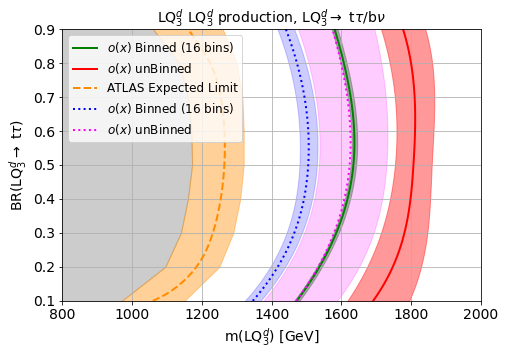

In [27]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})

test300 = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus_300,
                      'MLL_up': mass_Z95CL_MLL_min_300,
                     '16bins_low': mass_Z95CL_16bins_plus_300,
                      '16bins_up': mass_Z95CL_16bins_min_300})

colorsnum300 = pd.DataFrame({'BR': [0],
                    'MLL_low': [1],
                      'MLL_up': [1],
                     '16bins_low': [2],
                      '16bins_up': [2]})
colorsset300 = ['darkorange', 'magenta', 'blue']

mineral_names = test.columns[1:]
mineral_names300 = test300.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
for mineral_name300 in mineral_names300[:-1]:
    ax.plot(test300[mineral_name300], test300['BR'], linewidth=2, color='None')#,':', linewidth=2, color=colorsset300[colorsnum300[mineral_name300].tolist()[0]])
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
colors300 = [ "None", "magenta", "None", "blue", "None"]
previous_curve300 = 0
previous_name300 = ''
for mineral_name300, color300 in zip(mineral_names300, colors300):
    ax.fill_betweenx(test300['BR'], previous_curve300, test300[mineral_name300], color=color300, alpha=0.2)
    previous_curve300 = test300[mineral_name300]
    previous_name300 = mineral_name300
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.plot(mass_Z95CL_16bins_300, plotX_beta, ':', color='blue', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_300, plotX_beta, ':', color='magenta', lw=lw, label=r'$o(x)$ unBinned')

plt.xlim([800, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
#plt.savefig('exclusion_LQdown_14TeV.pdf', bbox_inches='tight')
plt.show()

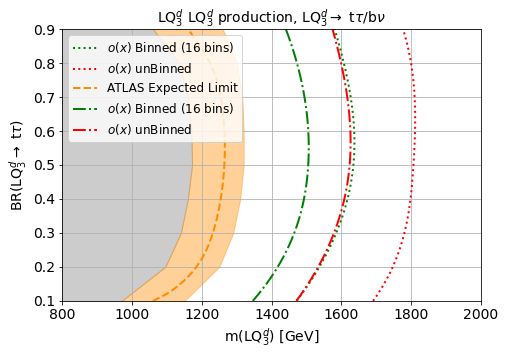

In [28]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, ':', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, ':', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.plot(mass_Z95CL_16bins_300, plotX_beta, '-.', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_300, plotX_beta, '-.', color='red', lw=lw, label=r'$o(x)$ unBinned')

plt.xlim([800, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
#plt.savefig('exclusion_LQdown_14TeV.pdf', bbox_inches='tight')
plt.show()